In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/open-problems-single-cell-perturbations/multiome_var_meta.csv
/kaggle/input/open-problems-single-cell-perturbations/adata_excluded_ids.csv
/kaggle/input/open-problems-single-cell-perturbations/multiome_train.parquet
/kaggle/input/open-problems-single-cell-perturbations/id_map.csv
/kaggle/input/open-problems-single-cell-perturbations/de_train.parquet
/kaggle/input/open-problems-single-cell-perturbations/sample_submission.csv
/kaggle/input/open-problems-single-cell-perturbations/adata_obs_meta.csv
/kaggle/input/open-problems-single-cell-perturbations/adata_train.parquet
/kaggle/input/open-problems-single-cell-perturbations/multiome_obs_meta.csv


In [3]:
%%time
fn = '/kaggle/input/open-problems-single-cell-perturbations/de_train.parquet'
df_de_train = pd.read_parquet(fn)# , index_col = 0)
print(df_de_train.shape)
df_de_train

(614, 18216)
CPU times: user 1.58 s, sys: 443 ms, total: 2.02 s
Wall time: 1.4 s


,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [5]:
X = df_de_train.iloc[:,5:]
X.head(5)

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0.104720,-0.077524,-1.625596,-0.144545,0.143555,0.073229,-0.016823,0.101717,-0.005153,1.043629,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,0.915953,-0.884380,0.371834,-0.081677,-0.498266,0.203559,0.604656,0.498592,-0.317184,0.375550,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,-0.387721,-0.305378,0.567777,0.303895,-0.022653,-0.480681,0.467144,-0.293205,-0.005098,0.214918,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,0.232893,0.129029,0.336897,0.486946,0.767661,0.718590,-0.162145,0.157206,-3.654218,-0.212402,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,4.290652,-0.063864,-0.017443,-0.541154,0.570982,2.022829,0.600011,1.231275,0.236739,0.338703,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


Basic Ideas
- weight cells which have closer lineage to target cells. for now arbitrarily weight them closer.
- PCA on whole data first

In [6]:
from sklearn.decomposition import PCA

expression_pca = PCA(n_components=150)
expression_pca.fit_transform(X)
reduced = expression_pca.transform(X)

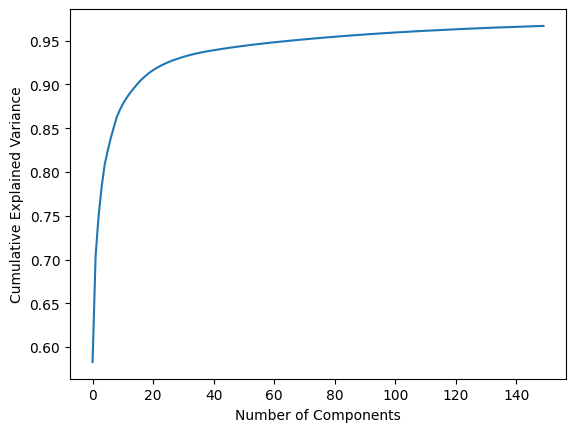

0.9669020985413317

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(expression_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

sum(expression_pca.explained_variance_ratio_)

In [30]:
df_transformed = pd.DataFrame(data=reduced, columns=[f"ExpressionPC{i+1}" for i in range(reduced.shape[1])])
pca_result = pd.concat([df_de_train.iloc[:,:5], df_transformed], axis=1)
pca_result

,cell_type,sm_name,sm_lincs_id,SMILES,control,ExpressionPC1,ExpressionPC2,ExpressionPC3,ExpressionPC4,ExpressionPC5,...,ExpressionPC141,ExpressionPC142,ExpressionPC143,ExpressionPC144,ExpressionPC145,ExpressionPC146,ExpressionPC147,ExpressionPC148,ExpressionPC149,ExpressionPC150
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-36.453699,-11.978529,-10.325804,-3.105771,-7.038439,...,2.138940,1.740347,3.275659,-2.590672,-0.059396,-2.555201,0.692002,2.524342,0.746015,4.773987
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-56.183083,-7.023339,-10.385958,-3.107539,-4.220357,...,-1.767498,1.824905,2.076859,2.160518,0.542337,-0.659064,-0.346383,1.390498,-0.347645,0.381266
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-101.187397,-9.699070,-13.033234,0.981408,-9.048147,...,-0.201343,1.495651,-1.091560,1.544733,-0.891825,-0.384393,-0.258906,2.201246,-0.211047,1.013709
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-8.525405,-16.438621,-6.131585,-10.634362,14.536690,...,-0.514065,0.123875,0.452037,1.187948,-0.686635,-1.949540,-0.344624,-1.384306,0.455179,0.167511
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,77.322471,-8.243784,-6.747717,-1.243601,-42.172469,...,-1.409743,7.477700,-6.097511,-0.178964,-4.438200,-9.379170,-6.366599,20.828244,9.390542,-6.054937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-118.674501,-10.008553,-17.696765,5.826348,-25.944437,...,-1.175010,3.702712,0.235245,3.615374,2.211904,0.836507,-1.856841,0.940795,1.953765,2.354377
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-50.344590,-15.266530,-7.485014,-4.040036,-3.706213,...,-0.263525,1.174371,0.939804,-2.297073,-0.304325,2.559954,1.965592,-5.059633,-0.160075,-2.009315
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-70.444165,-9.466616,-8.302391,-4.921166,-2.106416,...,-0.156127,-1.584527,0.900615,-3.687158,1.290433,-3.439238,1.528013,-6.834249,-1.917391,-2.547891
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-118.315277,-9.388081,-11.780419,3.913271,-13.477420,...,-1.281037,1.501154,0.769929,-3.387328,-0.472447,-1.114545,2.612158,-2.337297,-0.438266,-4.920797


TERMINOLOGY'

- INSIDE SET: drugs for which all 6 cell types have data
- OUTSIDE SET: drugs for which only the 4 cells have data
- ATOMS base 4 cell types
- TARGET CELLS : the 2 cell types we are trying to predict extract smiliarities of drugs

via extraction of as much descriptions as possible
feature


In [31]:
!pip install rdkit

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Read the dataset
data = df_de_train 

# Example: SMILES to fingerprints for drugs
fingerprints = []
for smiles in data['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fingerprint_list = list(fp)
    fingerprints.append(fingerprint_list)

# Convert the fingerprints to a DataFrame and combine with the original data
fingerprint_df = pd.DataFrame(fingerprints, columns=[f'bit_{i}' for i in range(2048)])  # Change 2048 to your fingerprint size
#result = pd.concat([data, fingerprint_df], axis=1)

# Now 'result' contains the original data along with the generated molecular fingerprints
print(fingerprint_df)

sparsity = 1.0 - np.count_nonzero(fingerprint_df) / fingerprint_df.size
sparsity_percentage = sparsity * 100

print(f"Sparsity of the matrix: {sparsity_percentage:.2f}%")

     bit_0  bit_1  bit_2  bit_3  bit_4  bit_5  bit_6  bit_7  bit_8  bit_9  \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
609      0      1      0      0      0      0      0      0      0      0   
610      0      0      0      0      0      0      0      0      0      0   
611      0      0      0      0      0      0      0      0      0      0   
612      0      0      0      0      0      0      0      0      0      0   
613      0      0      0      0      0      0      0      0      0      0   

     ...  bit_2038  bit_2039  bit_2040  bit_2041  bit_2042  bit_2043  \
0  

In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Read your dataset
data = df_de_train  # Replace 'your_dataset.csv' with your dataset path

# Example: Calculate descriptors for drugs
descriptors = []
for smiles in data['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        desc = {'SMILES': smiles}
        for desc_name, desc_func in Descriptors.descList:
            try:
                value = desc_func(mol)
                # Check if the descriptor is numerical
                if isinstance(value, (int, float)):
                    desc[desc_name] = value
            except:
                pass
        descriptors.append(desc)
        
# Convert the descriptors to a DataFrame and combine with the original data
descriptors_df = pd.DataFrame(descriptors)
descriptors_df = descriptors_df.drop(columns=['SMILES'])

# Now 'result' contains the original data along with the calculated molecular descriptors
print(descriptors_df.head())

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           6.691467        6.691467           0.585949       -0.585949   
1           6.691467        6.691467           0.585949       -0.585949   
2           6.691467        6.691467           0.585949       -0.585949   
3           6.691467        6.691467           0.585949       -0.585949   
4          13.573161       13.573161           0.005567       -1.529881   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.454545  11.400000  344.845         327.709  344.108026   
1  0.454545  11.400000  344.845         327.709  344.108026   
2  0.454545  11.400000  344.845         327.709  344.108026   
3  0.454545  11.400000  344.845         327.709  344.108026   
4  0.449102  44.171429  521.437         491.197  520.141944   

   NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  122  ...           0             0           0   
1                  122  ...     

In [33]:
combined_df = pd.concat([fingerprint_df, descriptors_df], axis=1)

combined_df = combined_df.loc[:, combined_df.nunique() != 1]

drug_pca = PCA(n_components=10) #
drug_pca_result = drug_pca.fit_transform(combined_df)

# Convert PCA result to a DataFrame
drug_pca_df = pd.DataFrame(data=drug_pca_result, columns=[f'DrugPC{i+1}' for i in range(10)])

# Combine PCA result with original data
#final_result = pd.concat([data, pca_df], axis=1)

# Now 'final_result' contains the original data, fingerprints, descriptors, and PCA-reduced features (500 columns)
print(drug_pca_df.head())

        DrugPC1     DrugPC2     DrugPC3     DrugPC4    DrugPC5    DrugPC6  \
0 -1.144276e+12 -256.674265  -75.767724 -115.889697 -44.326600 -23.615222   
1 -1.144276e+12 -256.674265  -75.767724 -115.889697 -44.326600 -23.615222   
2 -1.144276e+12 -256.674265  -75.767724 -115.889697 -44.326600 -23.615222   
3 -1.144276e+12 -256.674265  -75.767724 -115.889697 -44.326600 -23.615222   
4 -1.144205e+12   77.632361  142.569036   21.726620  23.862131 -56.221994   

     DrugPC7    DrugPC8    DrugPC9   DrugPC10  
0  48.732675 -15.543363  17.540238   8.246990  
1  48.732675 -15.543363  17.540238   8.246990  
2  48.732675 -15.543363  17.540238   8.246990  
3  48.732675 -15.543363  17.540238   8.246990  
4  14.530134  16.840470  14.018479 -21.295581  


In [34]:
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt


# Specify the number of components (sparse vectors) you want to obtain
n_components = 5

# Create and fit the SparsePCA model
sparse_pca = SparsePCA(n_components=n_components, alpha=0.1)  # Adjust alpha based on desired sparsity
X_sparse_pca = sparse_pca.fit_transform(combined_df)
X_sparse_pca

array([[-2.41081761e+11, -1.50934544e+11, -2.42607506e+11,
        -2.67794918e+11, -2.41086227e+11],
       [-2.41081761e+11, -1.50934544e+11, -2.42607506e+11,
        -2.67794918e+11, -2.41086227e+11],
       [-2.41081761e+11, -1.50934544e+11, -2.42607506e+11,
        -2.67794918e+11, -2.41086227e+11],
       ...,
       [-2.41079454e+11, -1.50933101e+11, -2.42605184e+11,
        -2.67792356e+11, -2.41083921e+11],
       [-2.41079454e+11, -1.50933101e+11, -2.42605184e+11,
        -2.67792356e+11, -2.41083921e+11],
       [-2.41079454e+11, -1.50933101e+11, -2.42605184e+11,
        -2.67792356e+11, -2.41083921e+11]])

In [35]:
# one hot encode cells
df_de_train.cell_type

cell_type_one_hot_encoded_data = pd.get_dummies(df_de_train['cell_type'], prefix='cell_type')
# len(set(one_hot_encoded_data)) # 6



In [36]:
import torch
import pandas as pd

# Assuming drug_pca_df and cell_type_one_hot_encoded_data are pandas DataFrames and pca_result is a Series or DataFrame

#print(pca_result.iloc[:, 5:])
filtered_pca_result = pca_result.iloc[:, 5:]
filtered_pca_result.fillna(filtered_pca_result.mean(), inplace=True)
print(type(pca_result))
#pca_result_numeric = pd.to_numeric(pca_result, errors='coerce')

# Convert the pandas DataFrames/Series to PyTorch tensors
X_drug = torch.tensor(drug_pca_df.values, dtype=torch.float32)
X_cell_type = torch.tensor(cell_type_one_hot_encoded_data.values, dtype=torch.float32)
Y = torch.tensor(filtered_pca_result.values, dtype=torch.float32)

# Concatenate the tensors along the second dimension (columns in pandas)
X = torch.cat((X_drug, X_cell_type), dim=1)

print(X.shape)
print(Y.shape)


<class 'pandas.core.frame.DataFrame'>
torch.Size([614, 16])
torch.Size([614, 150])


In [37]:
import torch

def mean_rowwise_rmse_loss(y_true, y_pred):
    """
    Custom loss function to calculate the Mean Rowwise Root Mean Squared Error (RMSE) loss.

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE loss as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = torch.sqrt(torch.mean((y_true - y_pred) ** 2, dim=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = torch.mean(rmse_per_row)

    return mean_rmse


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Define the neural network architecture
class BasicNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BasicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        # self.ln1 = nn.LayerNorm(256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, output_size)

        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Activation function for first hidden layer
        x = self.relu(self.fc2(x))  # Activation function for second hidden layer
        x = self.fc3(x)  # No activation function for output layer
        return x

# Check if CUDA is available and set the device accordingly
device = "cpu"#torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 16
output_size = 150
initial_learning_rate = 0.01
batch_size = 32
epochs = 10000


model = BasicNN(input_size, output_size).to(device)
print(f"Using device: {device}")
# Assuming X and Y are your data tensors
# Move your data tensors to the device (GPU or CPU)
X = X.to(device)
Y = Y.to(device)

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
optimizer = optim.Adam(model.parameters(), lr=initial_learning_rate)

# Move the split data to the device as well
X_train = X_train.to(device)
X_val = X_val.to(device)
Y_train = Y_train.to(device)
Y_val = Y_val.to(device)

# Create TensorDatasets for training and validation sets
train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

criterion = mean_rowwise_rmse_loss

training_loses = []
val_loses = []
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    
    for data, targets in train_loader:
        data, targets = data.to(device), targets.to(device)  # Move batch data to the device
        
        # Forward pass
        optimizer.zero_grad()  # Zero the gradient buffers
        output = model(data)
        loss = criterion(output, targets)
        
        # Backward pass and optimization
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        train_loss += loss.item() * data.size(0)  # Update total loss
    
    # Validation loop
    # if epoch % 500 == 0:
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No need to track the gradients
        for data, targets in val_loader:
            data, targets = data.to(device), targets.to(device)  # Move batch data to the device
            output = model(data)
            loss = criterion(output, targets)
            val_loss += loss.item() * data.size(0)  # Update total loss
    
    # Calculate average losses
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    
    training_loses.append(train_loss)
    val_loses.append(val_loss)
    
    # Print training/validation statistics
    if epoch % 500 == 0:
        print(f'Epoch: {epoch+1}/{epochs} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')

# Save the model if you need to use it later
torch.save(model.state_dict(), 'model.pth')

Using device: cpu
Epoch: 1/10000 	Training Loss: 10004137198.6390 	Validation Loss: 319293723.0331
Epoch: 501/10000 	Training Loss: 12.7159 	Validation Loss: 9.5865
Epoch: 1001/10000 	Training Loss: 12.7157 	Validation Loss: 9.5821
Epoch: 1501/10000 	Training Loss: 12.7157 	Validation Loss: 9.5817
Epoch: 2001/10000 	Training Loss: 12.7157 	Validation Loss: 9.5813
Epoch: 2501/10000 	Training Loss: 12.7157 	Validation Loss: 9.5815
Epoch: 3001/10000 	Training Loss: 12.7157 	Validation Loss: 9.5809
Epoch: 3501/10000 	Training Loss: 12.7157 	Validation Loss: 9.5810
Epoch: 4001/10000 	Training Loss: 12.7157 	Validation Loss: 9.5809
Epoch: 4501/10000 	Training Loss: 12.7156 	Validation Loss: 9.5814
Epoch: 5001/10000 	Training Loss: 12.7157 	Validation Loss: 9.5808
Epoch: 5501/10000 	Training Loss: 12.7157 	Validation Loss: 9.5807
Epoch: 6001/10000 	Training Loss: 12.7157 	Validation Loss: 9.5812
Epoch: 6501/10000 	Training Loss: 12.7157 	Validation Loss: 9.5808
Epoch: 7001/10000 	Training Los

In [14]:
file = '/kaggle/input/open-problems-single-cell-perturbations/id_map.csv'
df_de_predict = pd.read_csv(file)
print(df_de_predict.shape)
df_de_predict.head()

(255, 3)


,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867


In [15]:
smiles_list=df_de_train[["SMILES","sm_name"]].drop_duplicates()

smiles_list

,SMILES,sm_name
0,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,Clotrimazole
4,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,Mometasone Furoate
8,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,Idelalisib
14,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,Vandetanib
18,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,Bosutinib
...,...,...
594,COc1cc2c(cc1OC(C)C)[C@H](c1ccc(Cl)cc1)N(c1ccc(...,CGM-097
598,Cc1cc(C(C)Nc2ccccc2)c2nc(N3CCOCC3)cc(=O)n2c1,TGX 221
602,Nc1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,Azacitidine
606,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,Atorvastatin


In [16]:
predict = merged_df = pd.merge(df_de_predict, smiles_list, on='sm_name', how='left')
predict.head()

,id,cell_type,sm_name,SMILES
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...,Cc1nc2c(-c3cnc(N)nc3)nc(N3CCOCC3)nc2n1C(C)C
1,1,B cells,ABT-199 (GDC-0199),CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
2,2,B cells,ABT737,CN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=O)...
3,3,B cells,AMD-070 (hydrochloride),NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21
4,4,B cells,AT 7867,Clc1ccc(C2(c3ccc(-c4cn[nH]c4)cc3)CCNCC2)cc1


In [17]:
# Read the dataset
data = predict  

# Example: SMILES to fingerprints for drugs
fingerprints = []
for smiles in data['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fingerprint_list = list(fp)
    fingerprints.append(fingerprint_list)

# Convert the fingerprints to a DataFrame and combine with the original data
predict_fingerprint_df = pd.DataFrame(fingerprints, columns=[f'bit_{i}' for i in range(2048)])
print(predict_fingerprint_df)

     bit_0  bit_1  bit_2  bit_3  bit_4  bit_5  bit_6  bit_7  bit_8  bit_9  \
0        0      1      0      0      0      0      0      0      0      0   
1        0      0      0      0      0      0      0      0      0      0   
2        0      1      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
250      0      0      0      0      0      0      0      0      0      0   
251      0      1      0      0      0      0      0      0      0      0   
252      0      0      0      0      0      0      0      0      0      0   
253      0      0      0      0      0      0      0      0      0      0   
254      0      0      0      0      0      0      0      0      0      0   

     ...  bit_2038  bit_2039  bit_2040  bit_2041  bit_2042  bit_2043  \
0  

In [18]:
# Read your dataset
data = predict  # Replace 'your_dataset.csv' with your dataset path

# Example: Calculate descriptors for drugs
descriptors = []
for smiles in data['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        desc = {'SMILES': smiles}
        for desc_name, desc_func in Descriptors.descList:
            try:
                value = desc_func(mol)
                # Check if the descriptor is numerical
                if isinstance(value, (int, float)):
                    desc[desc_name] = value
            except:
                pass
        descriptors.append(desc)
        
# Convert the descriptors to a DataFrame and combine with the original data
predict_descriptors_df = pd.DataFrame(descriptors)
predict_descriptors_df = predict_descriptors_df.drop(columns=['SMILES'])

# Now 'result' contains the original data along with the calculated molecular descriptors
print(predict_descriptors_df.head())

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           5.635327        5.635327           0.232725        0.232725   
1          13.906068       13.906068           0.035867       -4.551966   
2          13.350173       13.350173           0.140221       -4.426475   
3           5.723917        5.723917           0.366608        0.366608   
4           6.098624        6.098624           0.060283        0.060283   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.755316  15.153846  354.418         332.242  354.191657   
1  0.076408  17.655738  868.457         818.057  867.318096   
2  0.057731  14.035714  813.446         768.086  812.258138   
3  0.639739  16.923077  349.482         322.266  349.226646   
4  0.743355  16.875000  337.854         317.694  337.134575   

   NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  136  ...           0             0           0   
1                  320  ...     

In [19]:
predict_combined_df = pd.concat([predict_fingerprint_df, predict_descriptors_df], axis=1)

predict_combined_df.head()

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Perform PCA to reduce the drug information to 250 columns

predict_drug_pca_result = drug_pca.fit_transform(predict_combined_df)

# Convert PCA result to a DataFrame
predict_drug_pca_df = pd.DataFrame(data=predict_drug_pca_result, columns=[f'DrugPC{i+1}' for i in range(250)])

# Now 'final_result' contains the original data, fingerprints, descriptors, and PCA-reduced features (500 columns)
print(predict_drug_pca_df.head())

        DrugPC1      DrugPC2     DrugPC3    DrugPC4    DrugPC5    DrugPC6  \
0 -1.377110e+12  -205.416607  -54.725580  39.757554  17.275755  66.653247   
1  4.238541e+13   973.380110   20.557836  23.827722  26.353040   8.887199   
2  9.781647e+11  1284.664401  165.127868 -49.638514 -10.297643 -17.252013   
3 -1.377110e+12  -303.368815  -19.462857 -37.417039  41.130241   5.084378   
4 -1.377111e+12  -346.249958  -27.701070 -76.248705  -6.027675  -5.071114   

     DrugPC7   DrugPC8    DrugPC9   DrugPC10  ...     DrugPC241     DrugPC242  \
0 -15.828953 -8.740835  -1.505203  -1.976003  ...  1.479421e-16 -9.377055e-17   
1  -8.926575 -3.050301 -30.154823   5.640116  ...  9.171290e-10  2.168364e-10   
2  69.029054 -7.742507 -23.227237  15.591442  ...  5.778435e-09  1.356794e-09   
3 -17.097870 -3.346018 -25.428369  -5.818352  ...  2.518484e-08  9.886420e-09   
4  -0.673028 -9.455481  -7.603309   5.943082  ...  1.301986e-08  5.260839e-09   

      DrugPC243     DrugPC244     DrugPC245     Dr

In [21]:
all_cell_types = cell_type_one_hot_encoded_data.columns

# Reindex the DataFrame to include all cell types with zero values
predict_cell_type_one_hot_encoded_data = pd.get_dummies(predict['cell_type'], prefix='cell_type')

predict_cell_type_one_hot_encoded_data = predict_cell_type_one_hot_encoded_data.reindex(columns=all_cell_types, fill_value=0)

predict_cell_type_one_hot_encoded_data
#predict_cell_type_one_hot_encoded_data.head()

,cell_type_B cells,cell_type_Myeloid cells,cell_type_NK cells,cell_type_T cells CD4+,cell_type_T cells CD8+,cell_type_T regulatory cells
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
250,0,1,0,0,0,0
251,0,1,0,0,0,0
252,0,1,0,0,0,0
253,0,1,0,0,0,0


In [22]:
predict_X_drug = torch.tensor(predict_drug_pca_df.values, dtype=torch.float32)
predict_X_cell_type = torch.tensor(predict_cell_type_one_hot_encoded_data.values, dtype=torch.float32)

predict_x_df = pd.concat([predict_combined_df, predict_cell_type_one_hot_encoded_data],axis=1)
# Concatenate the tensors along the second dimension (columns in pandas)
predict_X = torch.cat((predict_X_drug, predict_X_cell_type), dim=1)
predict_X.shape


torch.Size([255, 256])

In [23]:
prdicted_result=model(predict_X)

prdicted_result = prdicted_result.detach().numpy()

prdicted_result

array([[-4.8248222e+01, -1.2145311e+01, -6.7278309e+00, ...,
        -3.8908169e-02, -2.3791516e-02,  2.5437271e-02],
       [-4.8248222e+01, -1.2145311e+01, -6.7278309e+00, ...,
        -3.8908169e-02, -2.3791516e-02,  2.5437271e-02],
       [-4.8248222e+01, -1.2145311e+01, -6.7278309e+00, ...,
        -3.8908169e-02, -2.3791516e-02,  2.5437271e-02],
       ...,
       [-4.8248222e+01, -1.2145311e+01, -6.7278309e+00, ...,
        -3.8908169e-02, -2.3791516e-02,  2.5437271e-02],
       [-4.8248222e+01, -1.2145311e+01, -6.7278309e+00, ...,
        -3.8908169e-02, -2.3791516e-02,  2.5437271e-02],
       [-4.8248222e+01, -1.2145311e+01, -6.7278309e+00, ...,
        -3.8908169e-02, -2.3791516e-02,  2.5437271e-02]], dtype=float32)

In [24]:
ture_result=expression_pca.inverse_transform(prdicted_result)

In [25]:
reuslt_df = pd.DataFrame(ture_result, columns= df_de_train.iloc[:,5:].columns)

reuslt_df.insert(0, 'id', range(0, len(reuslt_df) ))

print(reuslt_df.shape)

reuslt_df.to_csv('result.csv', index=False)

(255, 18212)
